![](Logo3.png)

# Desarrollo del modelo de predicción con Regresión Lineal


## Tabla de Contenido

[1. Contexto de la práctica](#id1)<br>
[2. Evaluar dataset](#id2)<br>
[3. Dividir dataset en conjuntos de prueba y entrenamiento](#id3)<br>
[4. Regresion Lineal Simple con "city-mpg" para predecir el precio del automóvil](#id4)<br>
[5. Regresion Lineal Simple con "engine-size" para predecir el precio del automóvil](#id5)<br>
[6. Regresión lineal múltiple](#id6)  
[7. Evaluación del modelo usando visualización](#id7)  
[8. Seleccion de variables más importantes con scikit-learn](#id8)  


## 1. Contexto de la práctica    <a id='id1'> </a>

- En la primera parte, se realizará una regresión lineal simple con diferentes caracteristicas del vehiculo, para evaluar en que medida cada variable puede ayudarnos a predecir el precio del automóvil.
- Se realizará una regresión lineal simple por cada variable a evaluar.
-  En la segunda parte, se realizará una regresion lineal multiple evaluando en una sola regresión todas las variables utilizadas en los puntos anteriores.

**Regresión lineal simple**  
La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables:

- El predictor/variable independiente (X)
- El objetivp/variable dependiente (que queremos predecir)(Y)
- El resultado de **la regresión lineal es una función lineal que predice la variable de respuesta** (dependiente) en función de la(s) variable(s) predictora(s) (independiente(s)).

**Función Lineal**
$$
Yhat =  w X + b
$$

- **b** se refiere a la intersección de la línea de regresión
- **w** se refiere a la pendiente de la línea de regresión



## 2. Evaluar Dataset   <a id='id2'> </a>

En esta prcatica usaremos diferentes métodos para ver si ciertas caracteristicas pueden ser usadas para predecir el precio de un vehiculo.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [62]:
autos2 = pd.read_csv("autos2.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,0,1,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,0,1,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,0,1,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,0,1,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,0,1,1,Low


In [63]:
print(autos2.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
fuel-type_code         int64
diesel                 int64
gas                    int64
fuel-type-map          int64
horsepower-binned     object
dtype: object


In [64]:
autos2.shape

(201, 32)

### 3. Dividir dataset en conjuntos de prueba y entrenamiento  <a id='id3'> </a>

- El procedimiento de división de los datos en conjunto de entrenamiento y prueba se usa para **estimar el rendimiento de los algoritmos de aprendizaje automático**.
- Los datos de entrenamiento **(train)** se usan para entrenar el modelo.
- Los datos de prueba **(test)** se usan para hacer predicciones sobre datos que no se usan para entrenar el modelo.
- El objetivo es estimar el rendimiento del modelo de aprendizaje automático sobre nuevos datos, es decir, datos no utilizados para entrenar el modelo.

En esta fase se debe dividir el dataset original en conjuntos de datos de entrenamiento y prueba

- Dividir el DataFrame original `autos2` en `autos2_train` y `autos2_test`.
- Crear características de entrenamiento y prueba, `autos2_X_train` y `autos2_X_test`.
- Crear etiquetas de entrenamiento y prueba, `autos2_y_train` y `autos2_y_test`.  

- **train_test_split** Divide dataframes o matrices en subconjuntos aleatorios de entrenamiento y prueba.

In [65]:
from sklearn.model_selection import train_test_split

autos2_train, autos2_test = train_test_split( autos2, random_state=0 )


In [66]:
autos2_train.shape

(150, 32)

In [67]:
autos2_test.shape

(51, 32)

### 4. Regresion Lineal Simple con "city-mpg" para predecir el precio del automóvil?   <a id='id4'> </a>

- Para este ejemplo, **queremos evaluar cómo city-mpg puede ayudarnos a predecir el precio del automóvil.**
- Usando una regresión lineal simple, crearemos una función lineal con **"city-mpg" como la variable predictora** y el "precio" como la variable objetivo.

#### Crear el objeto de regresion lineal


In [68]:
# Modelo 1 de regesión lineal

lm1 = LinearRegression()
lm1

LinearRegression()

In [69]:
#  No podemos usar autos2_train y autos2_test directamente en la clasificación,
#  Por lo tanto definimos un nuevo dataset con 
#  las caracteristicas de entrenamiento a partir del dataset de entrenamiento

X_autos2_train = autos2_train[['city-mpg']]

# Objetivo o valor a predecir 
y_autos2_train = autos2_train[['price']]

In [70]:
# Realizamos el mismo procedimiento para los datasets de prueba

# variables predictoras
X_autos2_test = autos2_test[['city-mpg']]

# Objetivo o valor a predecir 
y_autos2_test = autos2_test[['price']]

In [71]:
# Entrenar el modelo de regresion lineal

lm1.fit(X_autos2_train, y_autos2_train)
lm1

LinearRegression()

In [72]:
# Revisar la precisión del modelo de entrenamiento

lm1.score( X_autos2_train, y_autos2_train )

0.4589830840071818

In [73]:
# Realizar la prediccion usando el modelo de regresión lineal
Yhat = lm1.predict( X_autos2_test  )

# Mostramos los primeros 5 valores de la predicción
Yhat[0:5]

array([[ 2837.21230737],
       [ 8988.28468667],
       [12832.70492374],
       [18983.77730304],
       [17446.00920821]])

In [74]:
# Revisar la precisión del modelo de prueba

lm1.score( X_autos2_test, y_autos2_test )

0.4401467208926817

### Valor de la intercepción

In [75]:
# Mostrar el valor de la intercepcion

lm1.intercept_

array([32054.80610905])

### valor del coeficiente 

In [76]:
# Mostrar los valores generado 

lm1.coef_

array([[-768.88404741]])

Como vimos arriba, deberíamos obtener un modelo lineal final con la estructura:

In [77]:
# Yhat = w X + b
# b = intercept  = 32054.81
# w =  coeficientes o peso de la caracteristica  -768.88

# Valor a predecir con un consumo de combustible de 24 mpg

Yhat =  32054.81 - 768.88 * 24

print("Precio", Yhat)

Precio 13601.690000000002


In [78]:
# Verificar autos con consumo de 24 mpg para verificar los precios de vehiculos
# de la prediccion anterior 

vehiculos = autos2[ autos2['city-mpg'] == 24 ]
vehiculos

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,0,1,1,Low
22,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,5500.0,24,7.833333,7957.0,9.791667,1,0,1,1,Low
26,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,5500.0,24,7.833333,8558.0,9.791667,1,0,1,1,Low
27,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,5000.0,24,7.833333,8921.0,9.791667,1,0,1,1,Low
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,5800.0,24,8.392857,12945.0,9.791667,1,0,1,1,Low
42,0,122,isuzu,gas,std,four,sedan,rwd,front,94.3,...,4800.0,24,8.103448,6785.0,9.791667,1,0,1,1,Low
43,2,122,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,5000.0,24,8.103448,11048.0,9.791667,1,0,1,1,Low
76,1,161,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,...,5500.0,24,7.833333,7689.0,9.791667,1,0,1,1,Low
116,1,119,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,...,5500.0,24,7.833333,7957.0,9.791667,1,0,1,1,Low
120,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,5000.0,24,7.833333,8921.0,9.791667,1,0,1,1,Low


### 5. Regresion Lineal Simple con "engine-size" para predecir el precio del automóvil?   <a id='id5'> </a>

- Para este ejemplo, **queremos evaluar cómo engine-size puede ayudarnos a predecir el precio del automóvil.**
- Usando una regresión lineal simple, crearemos una función lineal con **"engine-size" como la variable predictora** y el "precio" como la variable objetivo.

In [79]:
#  No podemos usar autos2_train y autos2_test directamente en la clasificación,
#  Por lo tanto definimos un nuevo dataset con 

#  las caracteristicas de entrenamiento a partir del dataset de entrenamiento
X2_autos2_train = autos2_train[['engine-size']]

# Objetivo o valor a predecir 
y2_autos2_train = autos2_train[['price']]

In [80]:
# Realizamos el mismo procedimiento para los datasets de prueba

# variables predictoras
X2_autos2_test = autos2_test[['engine-size']]

# Objetivo o valor a predecir 
y2_autos2_test = autos2_test[['price']]

In [81]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [82]:
# Propocionamos los valores al metodo fit (entrenar el modelo)

lm2.fit( X2_autos2_train, y2_autos2_train )
lm2

LinearRegression()

In [83]:
# Revisar la precisión del modelo de entrenamiento

lm2.score( X2_autos2_train, y2_autos2_train )

0.7252698507018966

In [84]:
lm2.coef_

array([[157.22665211]])

In [85]:
lm2.intercept_

array([-7046.06414113])

In [86]:
# Realizar la prediccion usando el modelo de regresión lineal
Y2hat = lm2.predict( X2_autos2_test  )

# Mostramos los primeros 5 valores de la predicción
Y2hat[0:5]

array([[ 7104.33454906],
       [10248.86759133],
       [16852.38698008],
       [21411.95989136],
       [18267.4268491 ]])

In [87]:
# Revisar la precisión del modelo de prueba

lm2.score( X2_autos2_test, y2_autos2_test )

0.798398169627247

In [88]:
# Yhat = w X + b
# b = intercept  = -7046.06
# w =  coeficientes o peso de la caracteristica  157.23

# Precio de un vehiculo con tamaño de motor de 110

Yhat2 = 157.23 * 110 -7046.06
Yhat2

10249.239999999998

In [89]:
# Verificar autos con tamaño de motor de 200 para verificar los precios de vehiculos
# de la prediccion anterior 

vehiculos = autos2[ autos2['engine-size'] == 110 ]
vehiculos


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
36,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,5800.0,27,7.121212,7895.0,8.703704,1,0,1,1,Low
37,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,5800.0,27,7.121212,9095.0,8.703704,1,0,1,1,Low
38,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,5800.0,27,7.121212,8845.0,8.703704,1,0,1,1,Low
39,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,5800.0,27,7.121212,10295.0,8.703704,1,0,1,1,Low
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,5800.0,24,8.392857,12945.0,9.791667,1,0,1,1,Low
41,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,5500.0,25,7.580645,10345.0,9.400000,1,0,1,1,Low
77,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,5500.0,23,7.833333,9959.0,10.217391,1,0,1,1,Low
84,1,125,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,...,5500.0,23,7.833333,9279.0,10.217391,1,0,1,1,Low
85,-1,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,5500.0,23,7.833333,9279.0,10.217391,1,0,1,1,Low
154,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,4500.0,34,6.527778,7898.0,6.911765,0,1,0,0,Low


### 6. Regresión lineal múltiple    <a id='id6'> </a>

**¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?**

- Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple. 
- La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). 
- La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. 
- Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

**La ecuacion del modelo:**

$$
Yhat = b + w1 * X1 +  w2 * X2 +  w3 * X3 +  w4 * X4
$$

**Variables predictoras a usar**
- Horsepower
- Curb-weight
- Engine-size
- City-mpg  


Vamos a desarrollar un nuevo modelo de prediccion usando diferentes carcateristicas oo variables que permitan hacer una prediccion ms exacta o real

In [90]:
# Aunque ya lo habiamos hecho anteriormente, repasamos la correlaciion de diversas 
# variables de tipo entero o decimal (float)

autos2[['horsepower', 'curb-weight', 'engine-size', 'city-mpg', 'wheel-base', 'price']].corr()

,horsepower,curb-weight,engine-size,city-mpg,wheel-base,price
horsepower,1.000000,0.757981,0.822668,-0.822192,0.371178,0.809607
curb-weight,0.757981,1.000000,0.849072,-0.749543,0.782097,0.834415
engine-size,0.822668,0.849072,1.000000,-0.650546,0.572027,0.872335
city-mpg,-0.822192,-0.749543,-0.650546,1.000000,-0.470606,-0.686571
wheel-base,0.371178,0.782097,0.572027,-0.470606,1.000000,0.584642
price,0.809607,0.834415,0.872335,-0.686571,0.584642,1.000000


In [91]:
# Modelo de regresion lineal multiple

# Variables predictoras
X3_autos2_train = autos2_train[['horsepower', 'curb-weight', 'engine-size', 'city-mpg', 'wheel-base']]

# Vaiable objetivo a predecir
y3_autos2_train = autos2_train[['price']]

In [92]:
# Realizamos el mismo procedimiento para los datasets de prueba

# variables predictoras
X3_autos2_test = autos2_test[['horsepower', 'curb-weight', 'engine-size', 'city-mpg', 'wheel-base']]

# Objetivo o valor a predecir 
y3_autos2_test = autos2_test[['price']]

In [93]:
lm3 = LinearRegression()
lm3

LinearRegression()

In [94]:
lm3.fit( X3_autos2_train, y3_autos2_train)

LinearRegression()

In [95]:
lm3.intercept_

array([-27356.70306923])

In [96]:
# Coeficientes de cada caracteristica o variable predictora a usar

lm3.coef_

array([[ 46.68382016,   4.45962947,  65.04811288,  40.54065411,
        149.63478447]])

### Funcion lineal

$$
Yhat = b + w1 * X1 +  w2 * X2 +  w3 * X3 +  w4 * X4
$$

**Por lo tanto**  

**Precio** = 27356.70 +  46.68 * **horsepower** + 4.46 * **curb-weight** +  65.04 * **engine-size** + 40.54  * **city-mpg** +   149.63 * **wheel-base**

In [97]:
lm3.score( X3_autos2_train, y3_autos2_train )

0.7997142067349934

In [98]:
Y3_hat = lm3.predict( X3_autos2_test )

In [99]:
# Tamaño 

Y3_hat.size

51

In [100]:
# Precisión del las pruebas

lm3.score( X3_autos2_test, y3_autos2_test )

0.7905259631715036

In [101]:
# Mostrar las primeroas 10 predicciones 
Y3_hat[0:10]

array([[ 5803.8721252 ],
       [10805.21086922],
       [20363.91084069],
       [21028.02273094],
       [20858.11892905],
       [ 9501.38519288],
       [13509.17551106],
       [ 6113.45644036],
       [17285.19910442],
       [ 7102.63683792]])

In [102]:
# Mostrar los valores reales del dataset de prueba
y3_autos2_test.head(10)

,price
18,6295.0
170,10698.0
107,13860.0
98,13499.0
177,15750.0
182,8495.0
5,15250.0
146,5348.0
12,21105.0
152,6938.0


In [103]:
y3_autos2_test['price']

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
182     8495.0
5      15250.0
146     5348.0
12     21105.0
152     6938.0
61     11245.0
125    37028.0
180     7995.0
154     7898.0
80     14869.0
7      18920.0
33      7129.0
130    15040.0
37      9095.0
74      6189.0
183     9495.0
145    11694.0
45     35550.0
159     8058.0
60     10795.0
123    32528.0
179     7975.0
185    11595.0
122    22018.0
44     32250.0
16     36880.0
55     15645.0
150     7898.0
111    17075.0
22      7957.0
189    12290.0
129    12170.0
4      17450.0
83      8189.0
106    12440.0
134     5118.0
66     28176.0
26      8558.0
113    17950.0
168    17669.0
63     18344.0
8      23875.0
75      6669.0
118     6692.0
143    10198.0
71     45400.0
Name: price, dtype: float64

### 7. Evaluación del modelo usando visualización  <a id='id7'> </a>

- Cuando se trata de **una regresión lineal simple**, una excelente manera de visualizar el ajuste de nuestro modelo es mediante los **gráficos de regresión**.
- La evaluacion de un modelo de **regresion lineal multiple** se vuelve un poco más complicado porque **no se puede visualizar con un diagrama de regresión** o gráfico residual.
- Una forma de ver el ajuste del modelo es mirar el **gráfico de distribución**
- Podemos **observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales**.

In [104]:
# Realizamos la prediccion, pasando los valores

Y3_hat = lm3.predict( X3_autos2_test )

C:\Anaconda3\envs\Diplomado python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\Diplomado python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


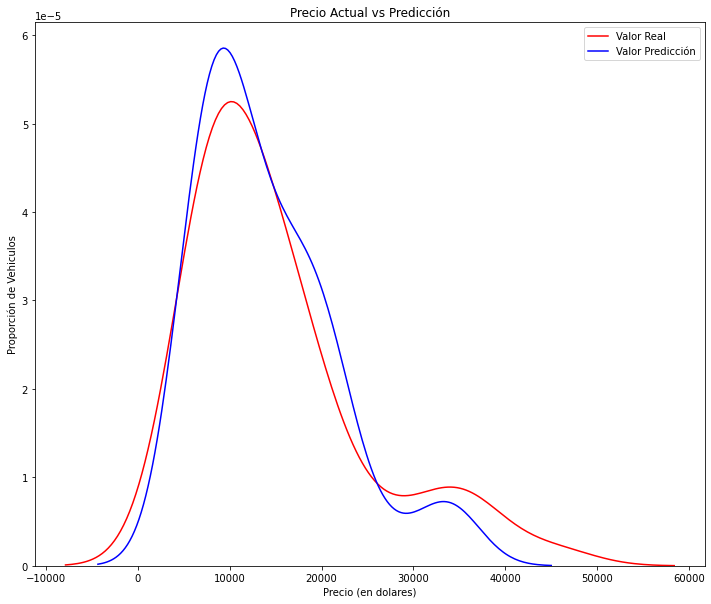

In [105]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot( y3_autos2_test['price'] , hist=False, color="r", label="Valor Real")
ax1 = sns.distplot(Y3_hat, hist=False, color="b", label="Valor de Predicción", ax = ax1 )

plt.title('Precio Actual vs Predicción')
plt.xlabel('Precio (en dolares)')
plt.ylabel('Proporción de Vehiculos')

ax1.legend(labels=['Valor Real','Valor Predicción'])

plt.show()
plt.close()

###    Gráfica de estimación de densidad kernel (KDE)

- Una gráfica de estimación de densidad kernel (KDE) es un método para **visualizar la distribución de observaciones en un conjunto de datos, de forma análoga a un histograma**. 
- KDE representa los datos utilizando una curva de densidad de probabilidad continua en una o más dimensiones.
- En relación con un histograma, KDE puede producir un gráfico menos desordenado y más interpretable, especialmente cuando se dibujan distribuciones múltiples. 
- Al igual que un histograma, la calidad de la representación también depende de la selección de buenos parámetros de suavizado.

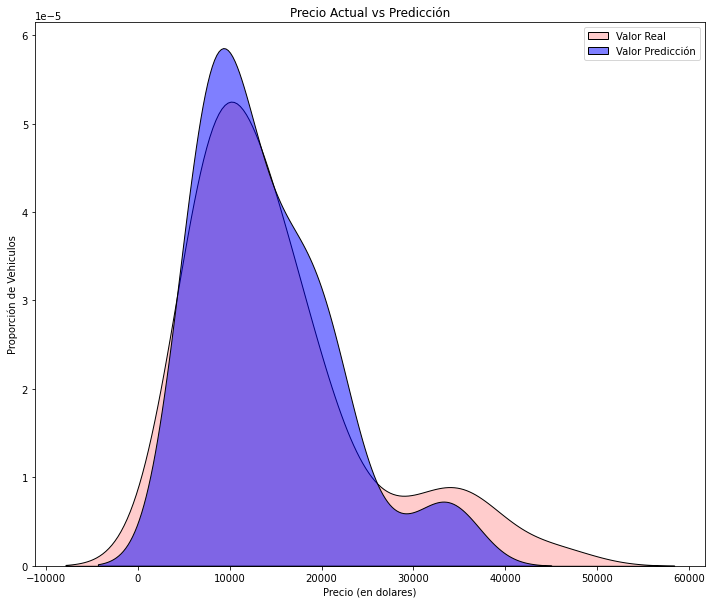

In [106]:
plt.figure(figsize=(12, 10))

ax1 = sns.kdeplot( y3_autos2_test['price'] ,  color="r",  multiple="stack", alpha=.2 )
ax = sns.kdeplot( pd.Series(Y3_hat.flatten()), color="b",  multiple="stack", alpha=.5, ax = ax1)

plt.title('Precio Actual vs Predicción')
plt.xlabel('Precio (en dolares)')
plt.ylabel('Proporción de Vehiculos')

ax1.legend(labels=['Valor Real','Valor Predicción'])

plt.show()
plt.close()

## 8. Selección de variables más importantes con scikit-learn <a id='id8'> </a>

- Dado un estimador externo que **asigna pesos a las características** (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la **eliminación recursiva de características (RFE)** es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños. 
- Primero, el estimador se entrena en el conjunto inicial de características y **la importancia de cada característica se obtiene a través de cualquier atributo específico**. 
- Luego, **las características menos importantes se eliminan del conjunto** actual de características. 
- Ese procedimiento **se repite recursivamente** en el conjunto de datos **hasta que finalmente se alcanza el número deseado de características para seleccionar**.

Referencias:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html  
- https://scikit-learn.org/stable/modules/svm.html  
- SVC is a classifier, SVR is a regressor.

In [107]:
# Variables predictoras
Z = autos2[['horsepower', 'curb-weight', 'engine-size', 'city-mpg', 'wheel-base', 'bore', 'stroke']]

# Vaiable objetivo a predecir
y = autos2['price']

In [109]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Procedimiento RFE para eliminación recursiva de características y seleccionar
# las más aptas para usarlas como variables predictoras

# Crear un estimador para clasificacion   SVC
estimator = SVC(kernel="linear", C=1)
selector = RFE(estimator=svc, n_features_to_select=4 , step=1)
selector.fit(Z, y)
selector

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=4)

In [110]:
#  Método que evalua la Lista de variabes que fueron seleccionadas como predictoras
#  Las que estan etiquetadas como True son las que se seleccionaron

selector.support_

array([ True,  True,  True, False,  True, False, False])

In [111]:
#  Método que pondera la Lista de variabes que fueron seleccionadas como predictoras
#  Las que estan etiquetadas como 1 son las que se seleccionaron
#  La etiquetda como 2 tiene mas relevancia que la 3, la 3 que la 4 y así sucesivamente

selector.ranking_

array([1, 1, 1, 2, 1, 4, 3])

####  Estimador para regresión

In [116]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Procedimiento RFE para eliminación recursiva de características y seleccionar
# las más aptas para usarlas como variables predictoras

# Crear un estimador para regresión   SVR
estimator2 = SVR(kernel="linear")
selector2 = RFE(estimator2, n_features_to_select=4, step=1)
selector2 = selector2.fit(Z, y)
selector2

RFE(estimator=SVR(kernel='linear'), n_features_to_select=4)

In [117]:
selector2.support_

array([ True, False,  True,  True,  True, False, False])

In [118]:
selector2.ranking_

array([1, 3, 1, 1, 1, 2, 4])